In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/A_Z Handwritten Data.csv'
df = pd.read_csv(file_path)

In [ ]:
alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [ ]:
# Extract labels and features
labels = df.iloc[:, 0].values  # First column contains the labels
x = df.iloc[:, 1:].values.reshape(-1, 28, 28) / 255.0  # Normalize and reshape images

print(f"Shape of feature data: {df.iloc[:, 1:].shape}")

Shape of feature data: (372450, 784)


In [ ]:
# Count occurrences of each label
unique, counts = np.unique(labels, return_counts=True)
alphabet_counts = dict(zip(alphabets, counts))

for letter, count in alphabet_counts.items():
    print(f"{letter} : {count}")

A : 13869
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


Plot for understanding the frequency of each alphabet letter in the dataset.

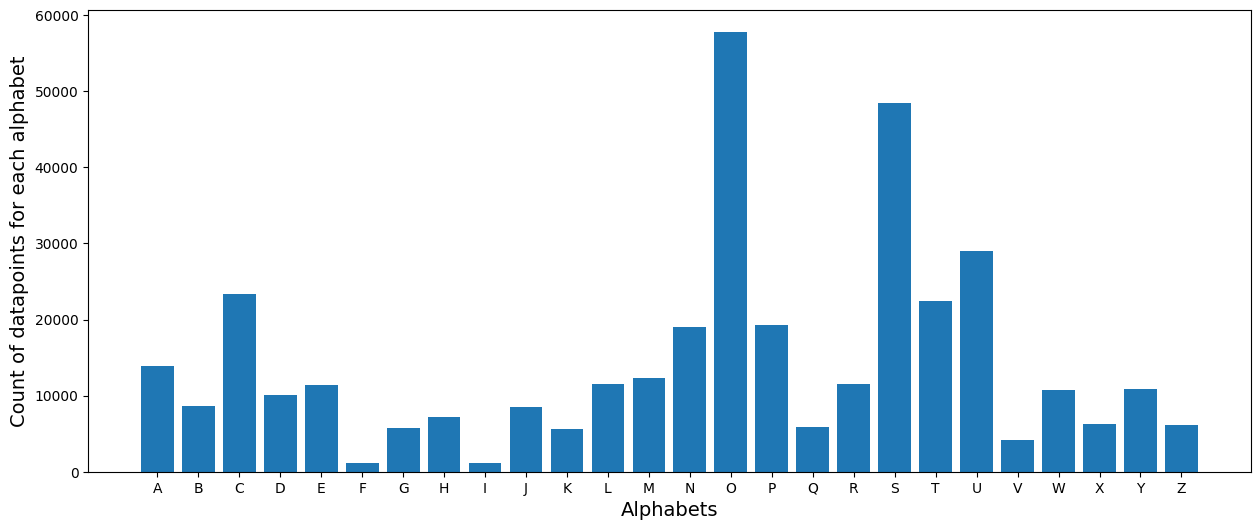

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('Alphabets',fontsize=14)
plt.ylabel('Count of datapoints for each alphabet',fontsize=14)
plt.bar(alphabets,counts)
plt.show()

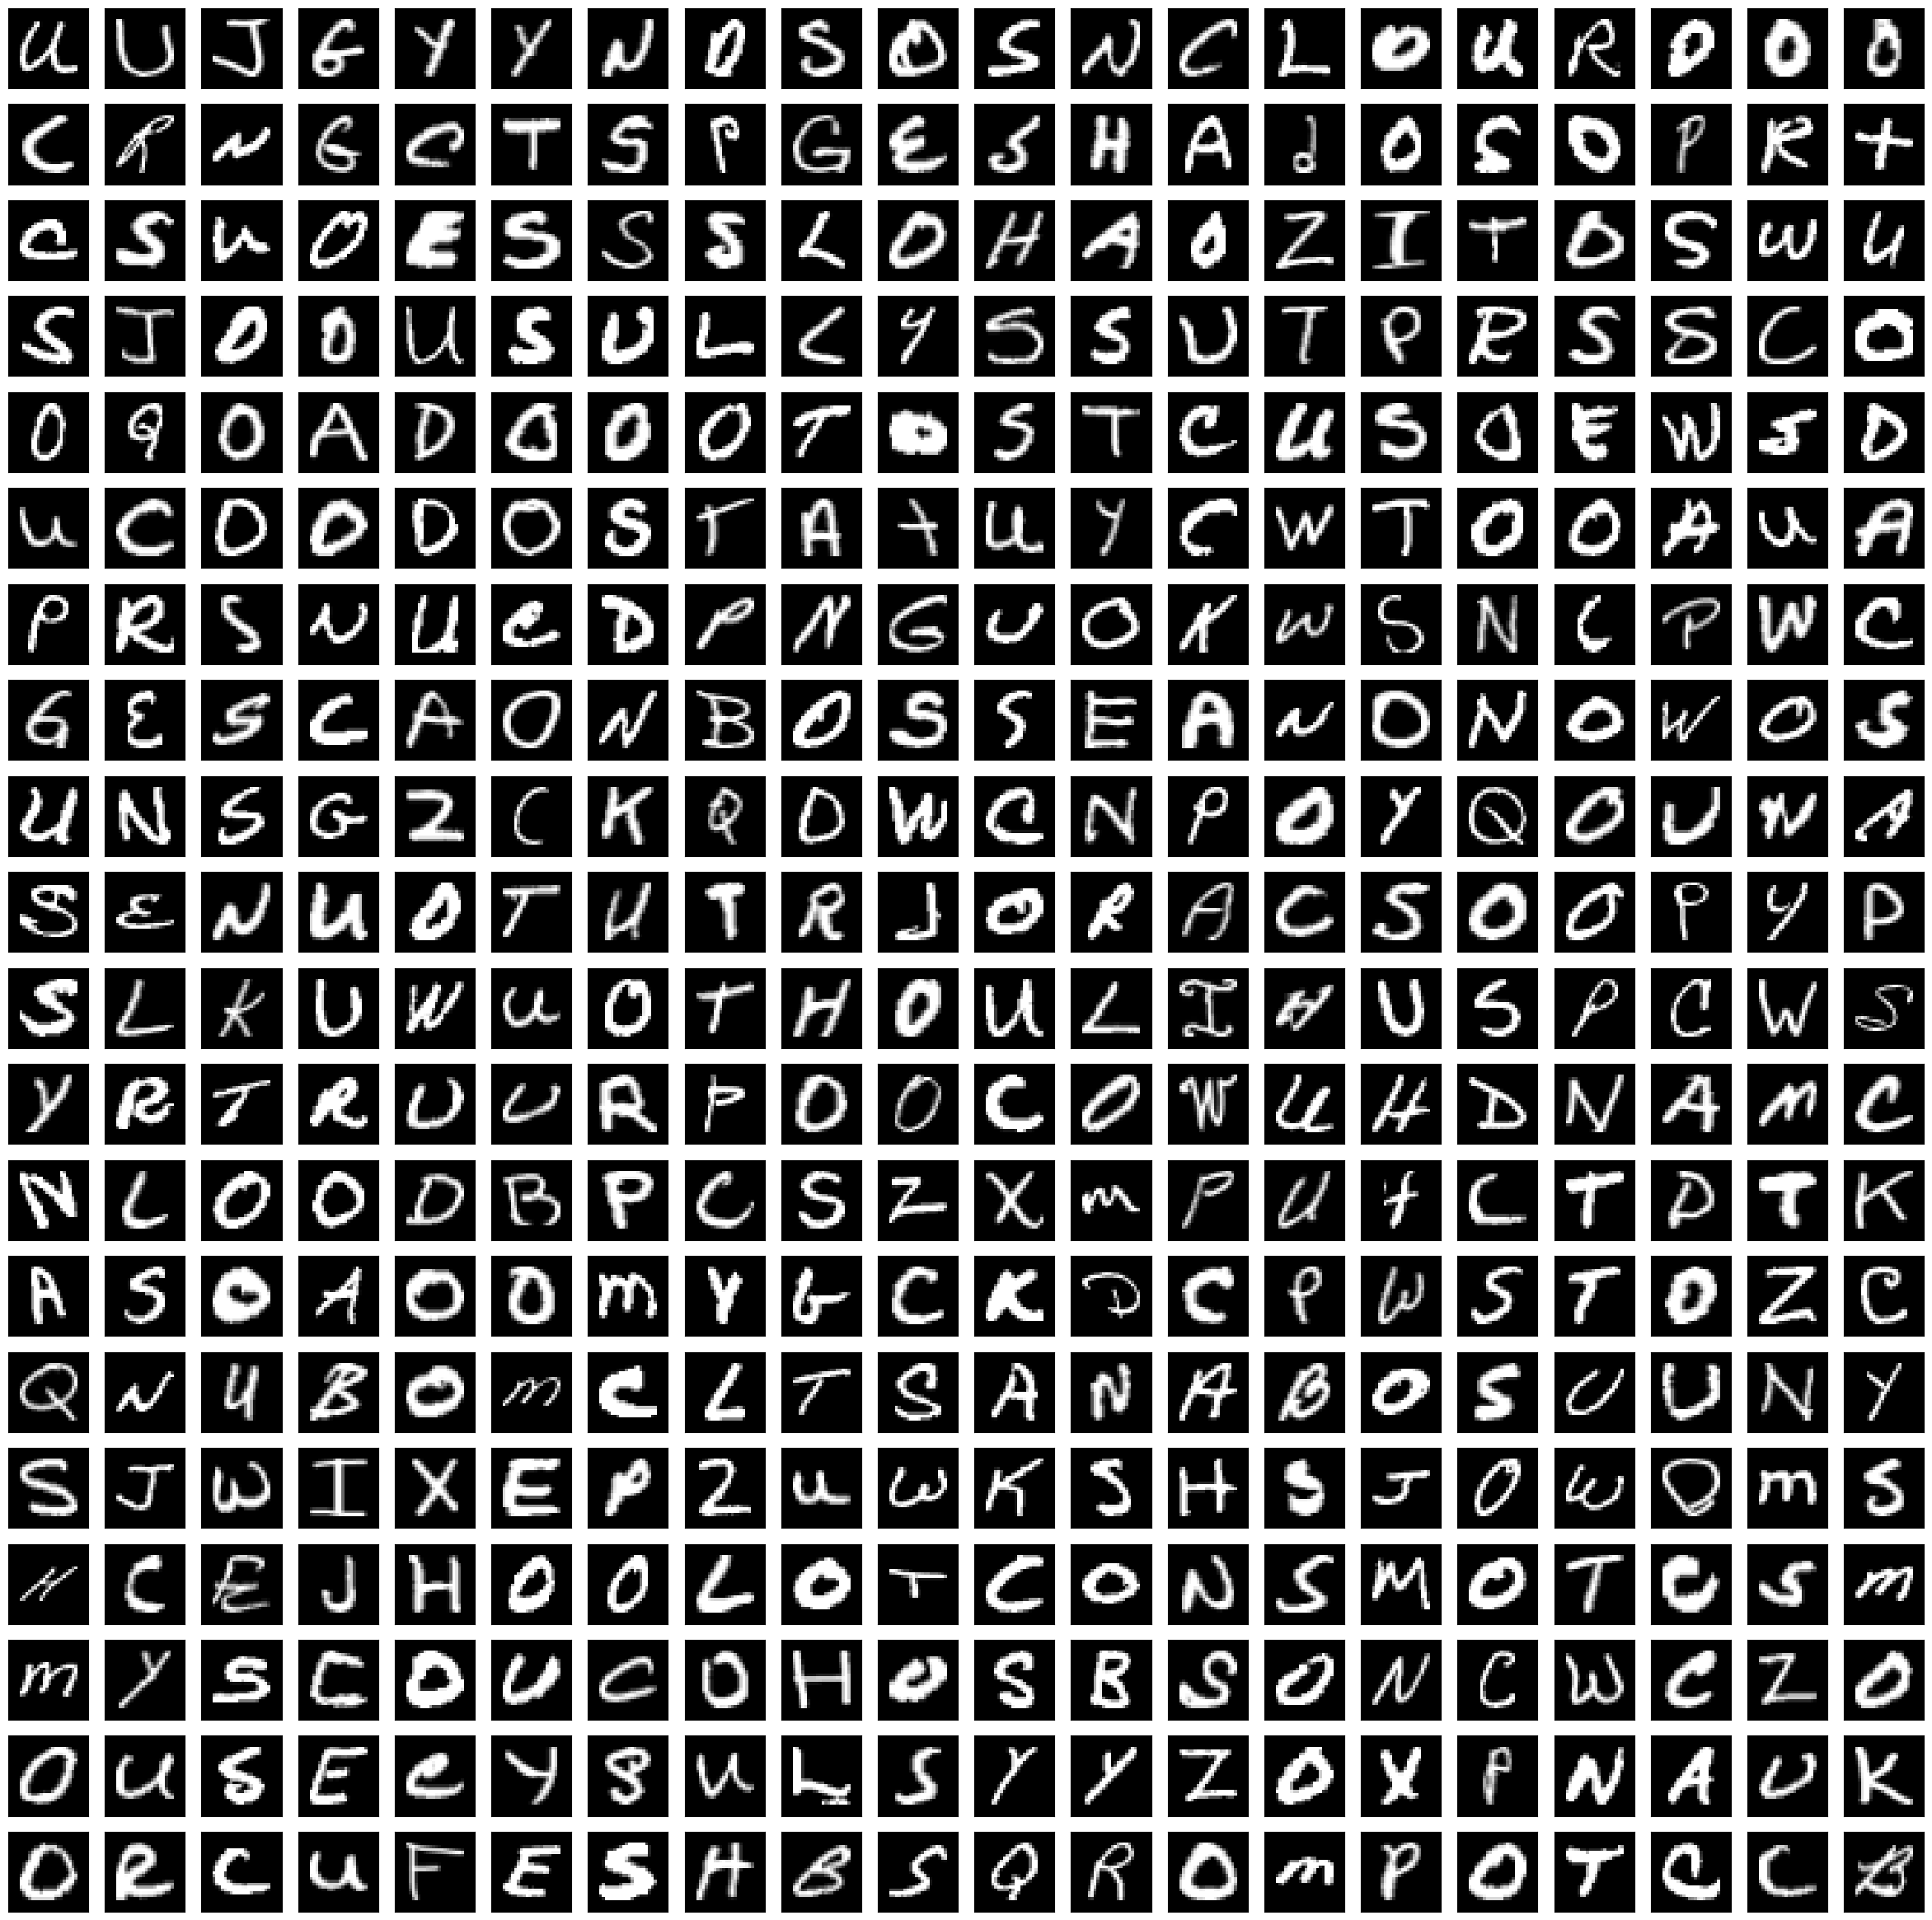

In [ ]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([]);
    plt.yticks([]);
    plt.imshow(x[i],cmap='gray')
    c+=1
del a

Training

In [ ]:
from sklearn.model_selection import train_test_split as train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,labels,test_size=0.2)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD

*CNN* network design

In [ ]:
nn_model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9),metrics=['accuracy'])
nn_model.summary()

Fitting the Neural Network model

In [ ]:
from keras.callbacks import Callback

class BatchLossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.batch_losses = []

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs.get('loss'))


In [ ]:
import matplotlib.pyplot as plt

# Train the model
batch_loss_tracker = BatchLossHistory()
nn_model_fit = nn_model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    epochs=1,
    callbacks=[batch_loss_tracker]
)


8381/8381 ━━━━━━━━━━━━━━━━━━━━ 3095s 369ms/step - accuracy: 0.8964 - loss: 0.3742 - val_accuracy: 0.9626 - val_loss: 0.1267


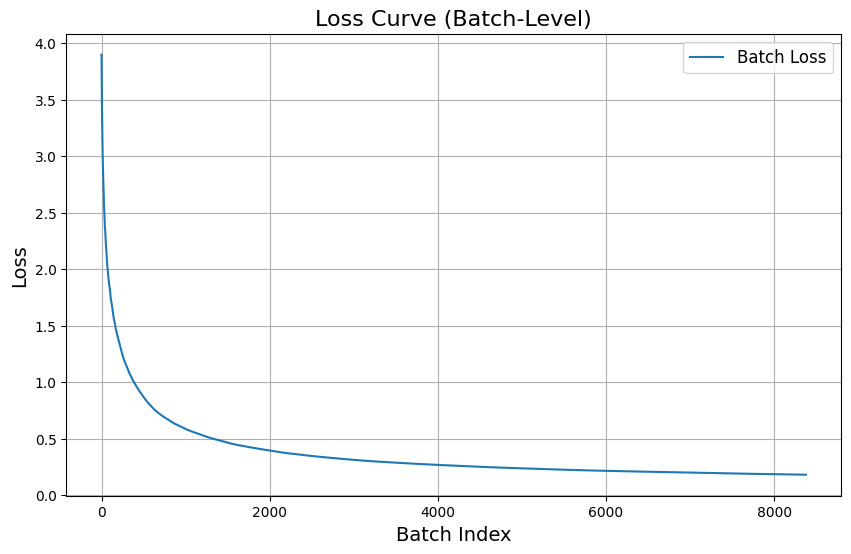

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(batch_loss_tracker.batch_losses, label='Batch Loss')
plt.title('Loss Curve (Batch-Level)', fontsize=16)
plt.xlabel('Batch Index', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=nn_model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alphabets[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alphabets[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

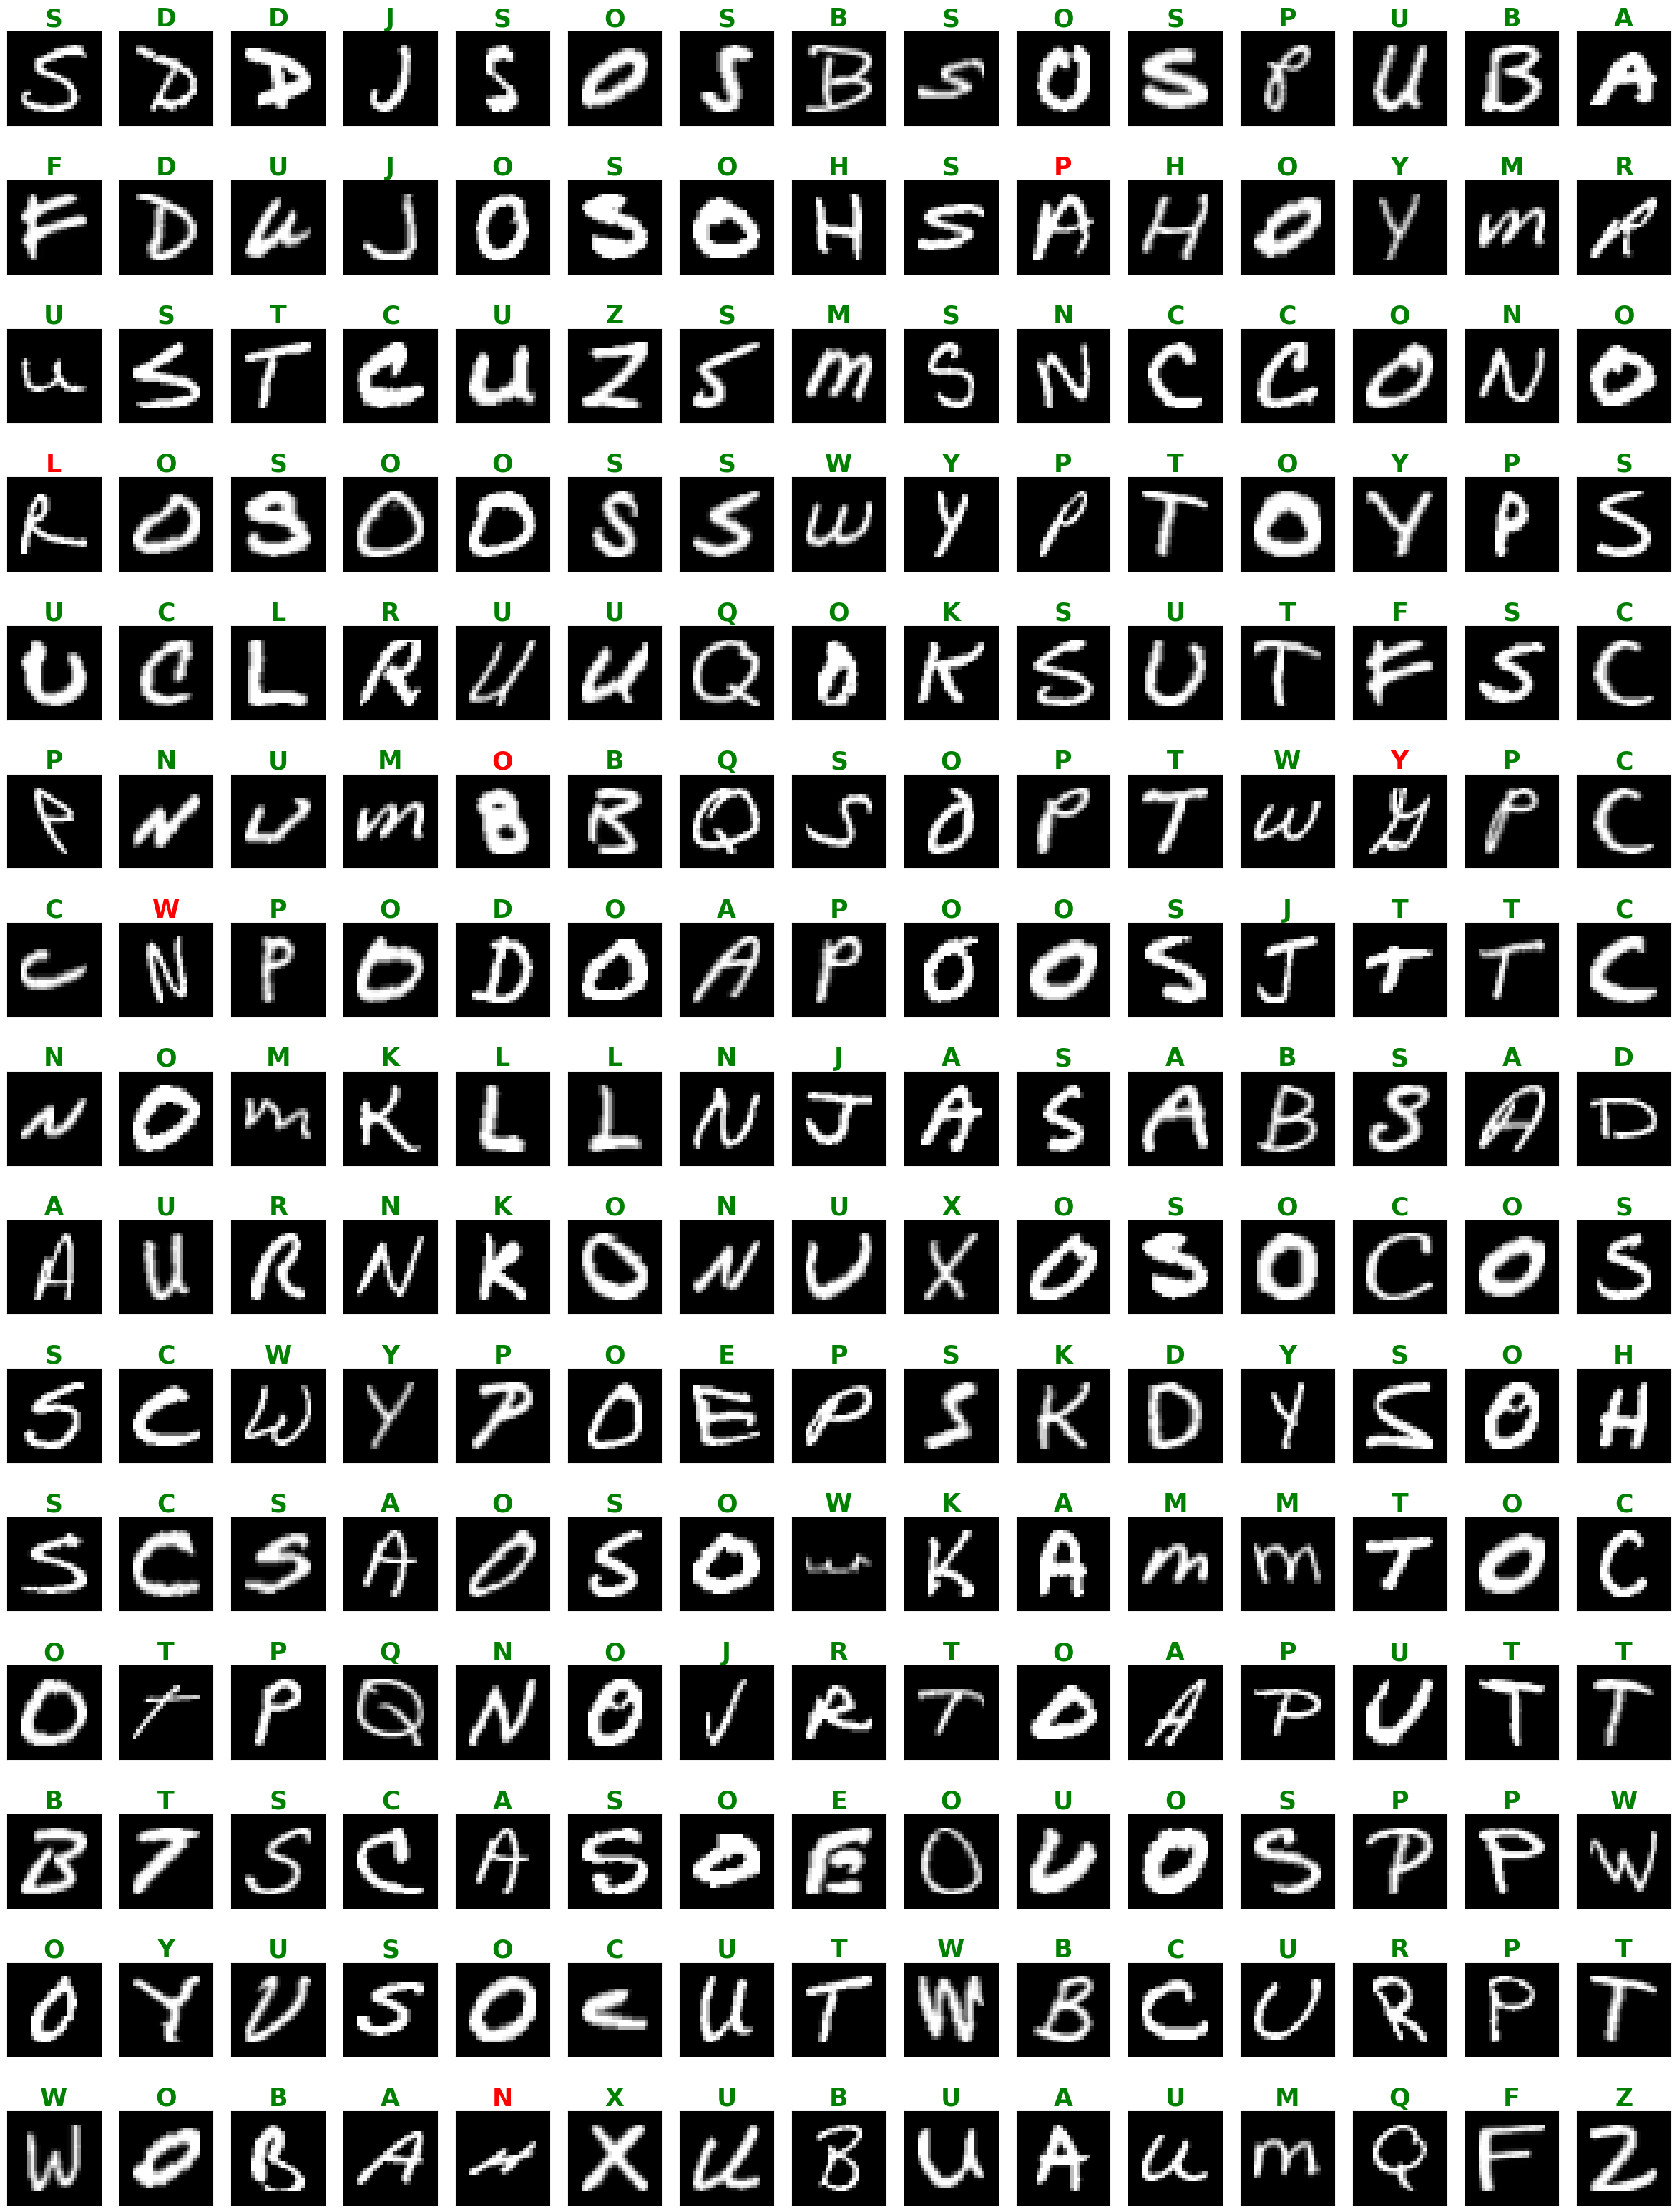

In [ ]:
test_images()

In [ ]:
import cv2

In [ ]:
def unseendata_test(filepath):
    image = cv2.imread(filepath)

    # Apply a median blur to reduce noise and smoothen the image
    blur_image = cv2.medianBlur(image, 7)

    # Convert the blurred image to grayscale for easier processing
    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to create a binary inverted image (black background, white text)
    _, thresh = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image to detect individual components (e.g., letters or noise)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # Extract bounding boxes for all contours
    boundingBoxes = [cv2.boundingRect(c) for c in contours]

    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)

        # Filter out the noise
        if w < 10 or h < 10:
            continue

        cv2.rectangle(blur_image, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)

        # Extract the region of interest corresponding to the contour
        digit = thresh[y:y+h, x:x+w]

        resized_digit = cv2.resize(digit, (18, 18))

        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        preprocessed_digits.append(padded_digit)

    plt.xticks([])
    plt.yticks([])
    plt.title("Input Image", color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)

    # Set up a figure to visualize predictions
    figr = plt.figure(figsize=(len(inp), 4))
    i = 1
    alphabets_unseen = []

    for digit in preprocessed_digits:
        # Normalize the digit and reshape it for the model
        [prediction] = nn_model.predict(digit.reshape(1, 28, 28, 1) / 255.)

        # Get the predicted alphabet based on the highest probability
        pred = alphabets[np.argmax(prediction)]
        alphabets_unseen.append(pred)

        # Add each digit to the figure with its predicted label
        figr.add_subplot(1, len(inp), i)
        i += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred, color='green', fontsize=18, fontweight="bold")

    print("Alphabets detected:", *alphabets_unseen)


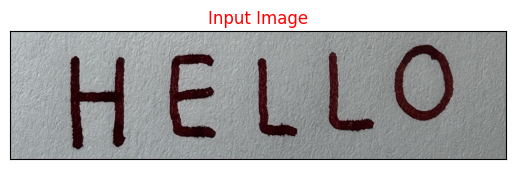

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Alphabets detected :  H E L L O


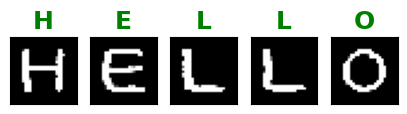

In [ ]:
unseendata_test("/content/drive/My Drive/Colab Notebooks/HW_tests/IMG_4193.jpeg")

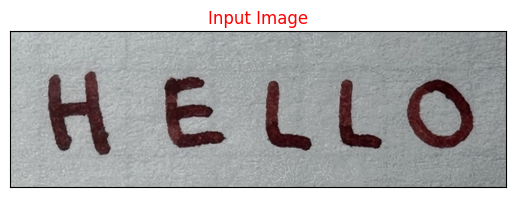

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Alphabets detected :  H E L L O


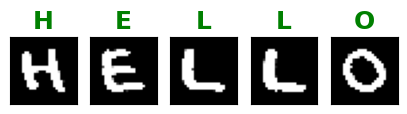

In [ ]:
unseendata_test("/content/drive/My Drive/Colab Notebooks/HW_tests/IMG_4192.jpeg")

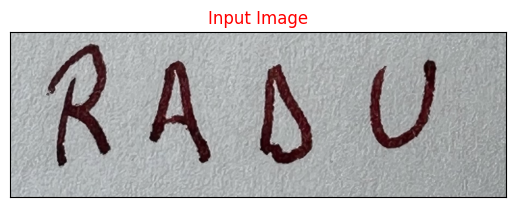

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Alphabets detected :  R A D U


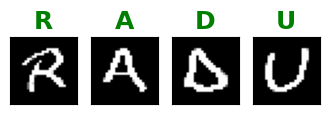

In [ ]:
unseendata_test("IMG_4194.jpeg")

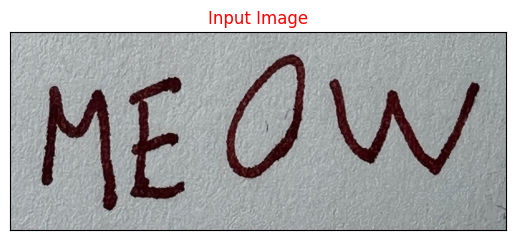

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Alphabets detected :  M E O W O


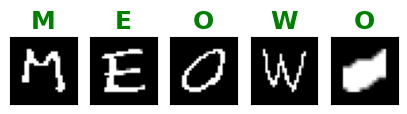

In [ ]:
unseendata_test("IMG_4195.jpeg")

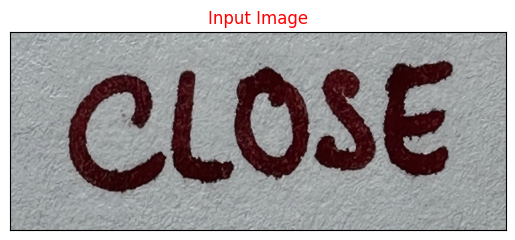

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Alphabets detected :  C L O S E


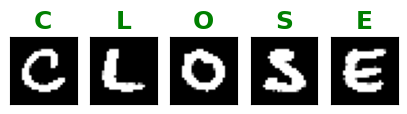

In [ ]:
unseendata_test("IMG_4197.jpeg")